# Cyber attack dataset Analysis :
This notebook provides a description of the dataset Cyber_attacks (available in [Kaggle](https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/data))\
It supplies 40 000 synthetic records spread in 25 attributes, each row corresponding to an attack type : Malware, DDoS and Intrusion. These later are used by hackers\pirates to compromise a target's IT security by violating the integrity, confidentiality and availability of sensitive data such as personal, financial, industrial or security information.
- Malware is a  malicious software produced to damage a computer system (e.g. viruses, Trojans, ransomware),
 - DDoS (Distributed Denial of Service) is a set of computer attacks designed to overwhelm a server or network with a large number of requests, overloading it or rendering it unavailable,
  - Intrusion is an unauthorized accesses to a computer system to extract, modify or destroy data via security holes [1].\

These dataset records attacks occurred from January 1, 2020, to October 11, 2023.

The aim of the present notebook is to understand the 3 types of attack and their correlation with the attributes in order to  predict them using a machine learning approach.
To answer this goal, our study is organized in four parts:
1. Exploration of raw data
2. Features engineering
3. Prediction of future attacks
4. Conclusion

*This project describes group work by Victor Coppin, Damien Rondet, Sachiththa Konara Mudiyanselage, Hugo Carton, Nans Long and Naro Kuoch.*




Before to go deeply in details in the overview of our data set, we need to describe the attributes.
These later are described in the list below, from information of wikipedia :
- Timestamp: Attack date and schedule
- Source IP Address: Pirate IP Address
- Destination IP Address: Recipient IP Address IP
- Source Port:Port used by Pirate
- Destination Port: Port used by Host target
- Protocol: Network protocol used in the communication Pirate/Host target
- Packet Length: Packet size (bytes)
- Packet Type: Packet classification
- Traffic Type: Characterization of network traffic
- Payload Data: Data carried in the packet
- Malware Indicators: Signs of  Pirates software
- Anomaly Scores: Numerical score of  a suspicious behavior in comparison to control condition
- Alerts/Warnings: Security message to notify an unusual event
- Attack Type: Identification of a Pirate attack
- Attack Signature: Specific pattern of Pirate attack
- Action Taken: Defense responses
- Severity Level: Impact level of the event
- User Information: User informations
- Device Information: Device informations
- Network Segment: The part of the network touched by the attack
- Geo-location Data: Geographic location of Pirate
- Proxy Information: Proxy server IP address
- Firewall Logs: Recording of firewall activities
- IDS/IPS Alerts: Alerts from intrusion detection system/ intrusion prevention system
- Log Source: identifies the origin of a recorded event


 In our exploration of raw data, we performed an overview of data set without transformations or creations of new variables in order to see the relations between the attributes. For this purpose, we examined the device responses, then the network traffic category, and we finished with a temporal vision of all the survey.

## EDA

In [1]:
import pandas as pd
import config
import utils
cyber_security_df = pd.read_csv(config.DATASET_CYBERSECURITY_ATTACKS_CSV)

- Dataset checkout

In [2]:
cyber_security_df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


df.info()

In [245]:
cyber_security_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

- Check missing values

In [4]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Alerts/Warnings           20067
IDS/IPS Alerts            20050
Malware Indicators        20000
Firewall Logs             19961
Proxy Information         19851
Source IP Address             0
Destination IP Address        0
Source Port                   0
Timestamp                     0
Traffic Type                  0
Packet Type                   0
Packet Length                 0
Protocol                      0
Destination Port              0
Attack Type                   0
Payload Data                  0
Anomaly Scores                0
Severity Level                0
Action Taken                  0
Attack Signature              0
User Information              0
Geo-location Data             0
Network Segment               0
Device Information            0
Log Source                    0
dtype: int64

- Missing values by percentage

In [5]:
cyber_security_df.isnull().sum().sort_values(ascending=False) / len(cyber_security_df) * 100

Alerts/Warnings           50.1675
IDS/IPS Alerts            50.1250
Malware Indicators        50.0000
Firewall Logs             49.9025
Proxy Information         49.6275
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Timestamp                  0.0000
Traffic Type               0.0000
Packet Type                0.0000
Packet Length              0.0000
Protocol                   0.0000
Destination Port           0.0000
Attack Type                0.0000
Payload Data               0.0000
Anomaly Scores             0.0000
Severity Level             0.0000
Action Taken               0.0000
Attack Signature           0.0000
User Information           0.0000
Geo-location Data          0.0000
Network Segment            0.0000
Device Information         0.0000
Log Source                 0.0000
dtype: float64

# Handle Missing Values

In [7]:
cyber_security_df['Alerts/Warnings'].value_counts()

Alerts/Warnings
Alert Triggered    19933
Name: count, dtype: int64

In [8]:
cyber_security_df['Alerts/Warnings'] = cyber_security_df['Alerts/Warnings'].apply(lambda x: 'Yes' if x == 'Alert Triggered' else 'No')

In [10]:
cyber_security_df['Malware Indicators'].value_counts()

Malware Indicators
IoC Detected    20000
No Detection    20000
Name: count, dtype: int64

In [9]:
cyber_security_df['Malware Indicators'] = cyber_security_df['Malware Indicators'].apply(lambda x: 'No Detection' if pd.isna(x) else x)

In [11]:
cyber_security_df['Firewall Logs'].value_counts()

Firewall Logs
Log Data    20039
Name: count, dtype: int64

In [12]:
cyber_security_df['Firewall Logs'] = cyber_security_df['Firewall Logs'].apply(lambda x: 'No Log Data' if pd.isna(x) else x)

In [13]:
cyber_security_df['IDS/IPS Alerts'].value_counts()

IDS/IPS Alerts
Alert Data    19950
Name: count, dtype: int64

In [14]:
cyber_security_df['IDS/IPS Alerts'] = cyber_security_df['IDS/IPS Alerts'].apply(lambda x: 'No Alerts' if pd.isna(x) else x)

In [16]:
cyber_security_df['Proxy Information'] = cyber_security_df['Proxy Information'].apply(lambda x: 'No proxy' if pd.isna(x) else x)

In [17]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64

In [258]:
cyber_security_df['OS'] = cyber_security_df.apply(lambda x:utils.extract_device_information(x['Device Information'], utils.InfoType.OS), axis=1)

In [259]:
cyber_security_df['Browser'] = cyber_security_df.apply(lambda x:utils.extract_device_information(x['Device Information'], utils.InfoType.BROWSER), axis=1)

In [260]:
cyber_security_df['Device'] = cyber_security_df.apply(lambda x:utils.extract_device_information(x['Device Information'], utils.InfoType.DEVICE), axis=1)

# NEW

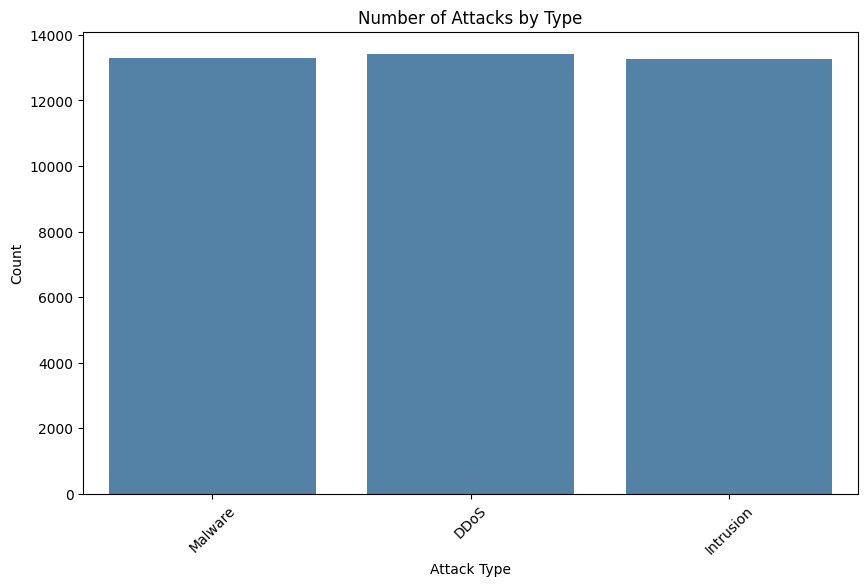

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))
plt.title("Number of Attacks by Type")

# Create a vertical count plot
sns.countplot(data=cyber_security_df, x='Attack Type', color='steelblue')

# Formatting
plt.xlabel("Attack Type")
plt.ylabel("Count")

plt.xticks(rotation=45)

# Show plot
plt.show()

The attack types—Malware, DDoS, and Intrusions—are equally distributed. Therefore, the ML project is a balanced classification problem

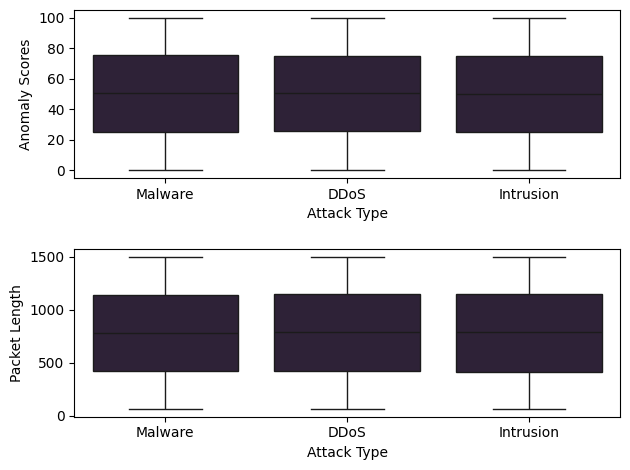

In [19]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1)

# Malware Indicators
sns.boxplot(data=cyber_security_df, x="Attack Type", y="Anomaly Scores", ax=ax1)

# IDS/IPS Alerts
sns.boxplot(data=cyber_security_df, x="Attack Type", y="Packet Length", ax=ax2)



# sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

- The distribution of Anomaly scores for each Attack Type Class appear similar based on their box plots. Threfore it is no significant difference in Anomaly Scores distributions across the Attack Type classes.
- The distribution of Packet Lenght for each Attack Type Class appear similar based on their box plots. Threfore it is no significant difference in Packet Lenght distributions across the Attack Type classes.

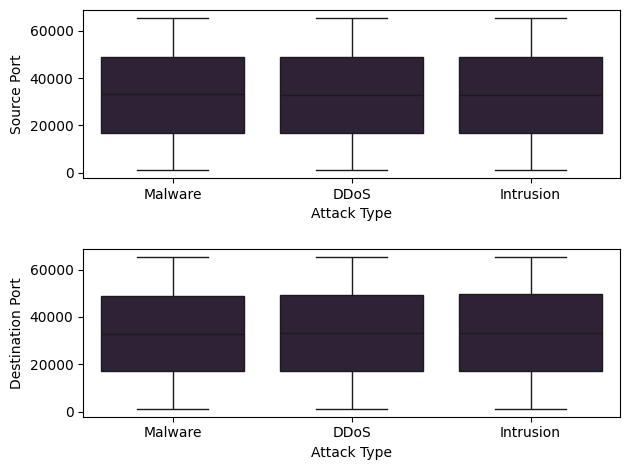

In [20]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1)

# Malware Indicators
sns.boxplot(data=cyber_security_df, x="Attack Type", y="Source Port", ax=ax1)

# IDS/IPS Alerts
sns.boxplot(data=cyber_security_df, x="Attack Type", y="Destination Port", ax=ax2)



# sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

- The distribution of Source Port for each Attack Type Class appear similar based on their box plots. Threfore it is no significant difference in Source Port distributions across the Attack Type classes.
- The distribution of Destination Port for each Attack Type Class appear similar based on their box plots. Threfore it is no significant difference in Destination distributions across the Attack Type classes.

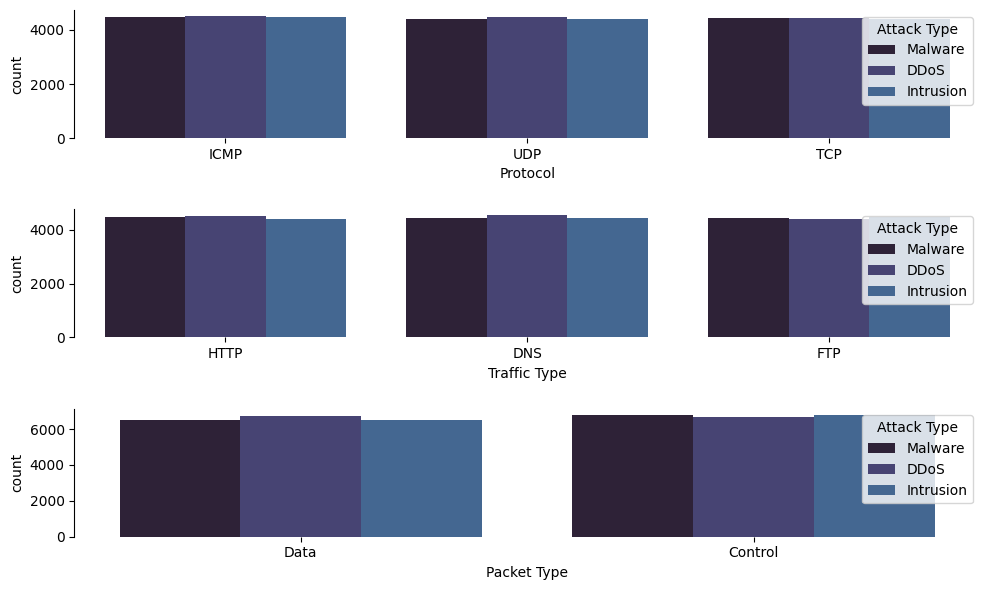

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("mako")

fig,(ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

# Protocol
sns.countplot(data=cyber_security_df, x='Protocol', hue='Attack Type',ax=ax1)

# Traffic Type
sns.countplot(data=cyber_security_df, x='Traffic Type', hue='Attack Type',ax=ax2)

# Packet Type
sns.countplot(data=cyber_security_df, x='Packet Type', hue='Attack Type',ax=ax3)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()

- Within each **Protocol** (*ICMP*, *UDP*, *TCP*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Protocol**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Protocol**. 

- Within each **Traffic Type** (*HTTP*, *DNS*, *FTP*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Traffic Type**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Traffic Type**. 

- Within each **Packet Type** (*Control*, *Data*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Packet Type**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Packet Type**. 


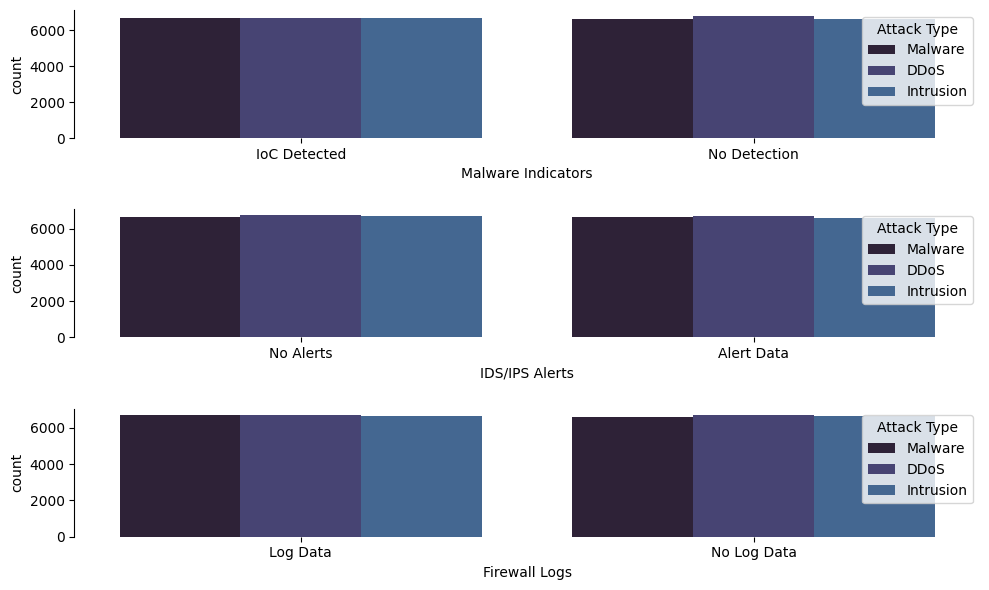

Malware Indicators
IoC Detected    20000
No Detection    20000
Name: count, dtype: int64

In [22]:
sns.set_palette("mako")

fig,(ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Malware Indicators', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='IDS/IPS Alerts', hue='Attack Type',ax=ax2)

# Firewall Logs
sns.countplot(data=cyber_security_df, x='Firewall Logs', hue='Attack Type',ax=ax3)

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()
cyber_security_df['Malware Indicators'].value_counts()

- Within each **Malware Indicators** (*IoC Detected*, *No Detection*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Protocol**, the count **Attack Type** classes are evenly distributed. This indicates the for each **Attack type** the system is responding in a similar way. For each Attack Type way the security system is reacting the same way.

- Within each **IDS/IPS Alerts** (*Alerts*, *No Alerts*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **IDS/IPS Alerts**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **IDS/IPS Alerts**. The type of attack doesn't change how  many alerts the system produces.

- Within each **Firewall Logs** (*Log Data*, *No Log Data*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Firewall Logs**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Firewall Logs**. The type of attack doesent make noticeble diffence inthe how the firewall logdata

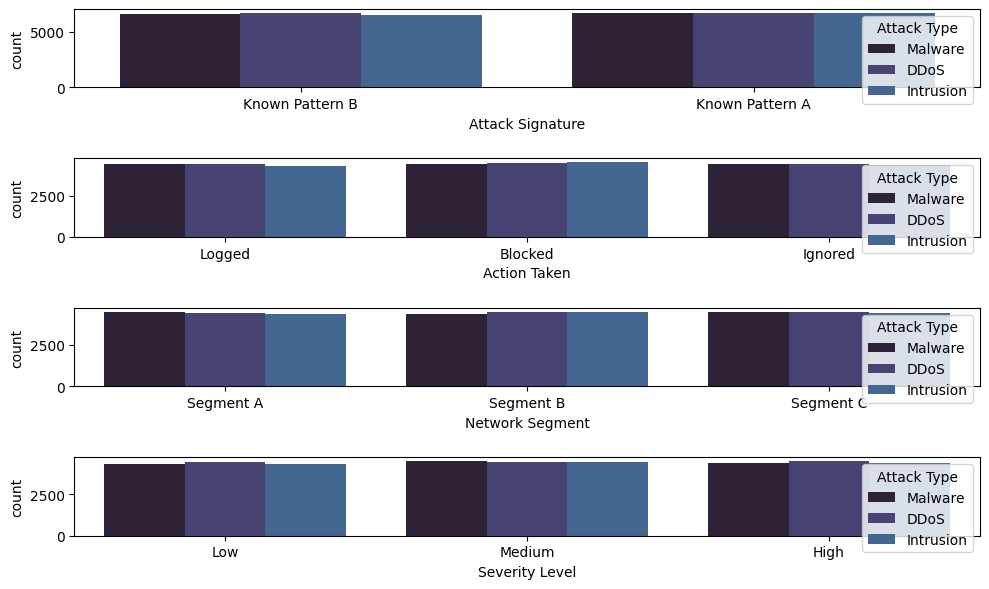

Malware Indicators
IoC Detected    20000
No Detection    20000
Name: count, dtype: int64

In [23]:
sns.set_palette("mako")

fig,(ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Attack Signature', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='Action Taken', hue='Attack Type',ax=ax2)

# Firewall Logs
sns.countplot(data=cyber_security_df, x='Network Segment', hue='Attack Type',ax=ax3)

sns.countplot(data=cyber_security_df, x='Severity Level', hue='Attack Type',ax=ax4)

plt.tight_layout(h_pad=2)
plt.show()
cyber_security_df['Malware Indicators'].value_counts()

- Within each **Attack Signature** (*Known Pattern A*, *Known Pattern B*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Attack Signature**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Attack Signature**. 

- Within each **Action Taken** (*Logged*, *Blocked*, *Ignored*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Action Taken**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Action Taken**. 

- Within each **Network Segment** (*Segment A*, *Segment B*, *Segment C*), the count of **Attack Type** classes (*Malware*, *Intrusion*, *DDoS*) is uniform. Additionally, for each **Network Segment**, the count **Attack Type** classes are evenly distributed. This indicates no significant variation of **Attack Type** with **Network Segment**. 

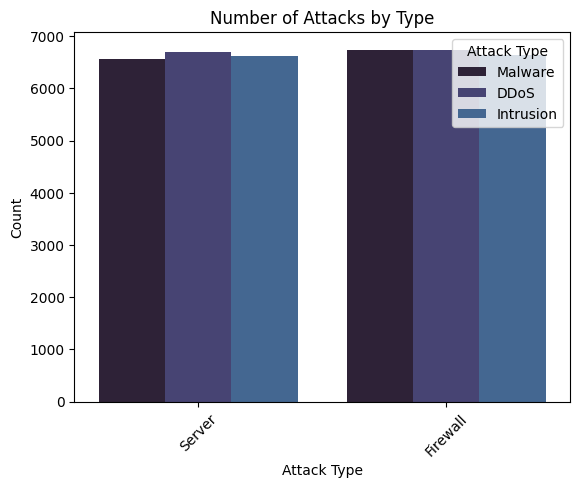

In [24]:
plt.title("Number of Attacks by Type")

# Create a vertical count plot
sns.countplot(data=cyber_security_df, x='Log Source', hue='Attack Type')

# Formatting
plt.xlabel("Attack Type")
plt.ylabel("Count")

plt.xticks(rotation=45)

# Show plot
plt.show()

In [25]:
import ipaddress

def get_ip_class(ip_address):
    first_octet = int(ip_address.split('.')[0])

    if 1 <= first_octet <= 126:
        return "Class A"
    elif 128 <= first_octet <= 191:
        return "Class B"
    elif 192 <= first_octet <= 223:
        return "Class C"
    elif 224 <= first_octet <= 239:
        return "Class D"
    elif 240 <= first_octet <= 255:
        return "Class E"
    else:
        return "Invalid IP Address"
    



In [26]:
cyber_security_df['Source IP Class'] = cyber_security_df['Source IP Address'].apply(get_ip_class)
cyber_security_df['Destination IP Class'] = cyber_security_df['Destination IP Address'].apply(get_ip_class)

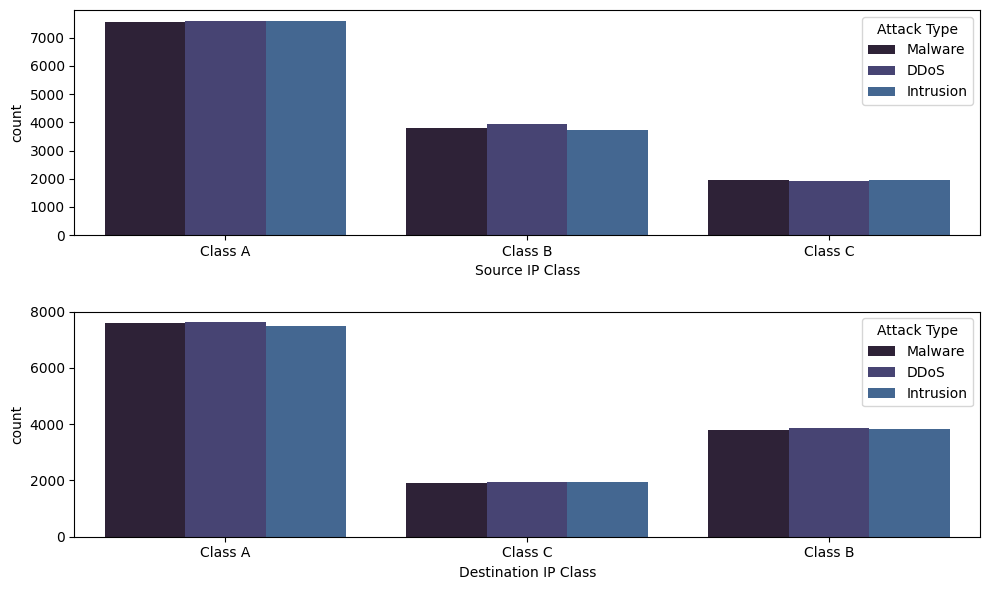

In [27]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Source IP Class', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='Destination IP Class', hue='Attack Type',ax=ax2)
plt.tight_layout(h_pad=2)

plt.show()

In [28]:
import ipaddress
def is_private_ip(ip_address):
    return  "Private" if ipaddress.ip_address(ip_address).is_private else "Public"

In [29]:
cyber_security_df['Source IP Visibility'] = cyber_security_df['Source IP Address'].apply(is_private_ip)
cyber_security_df['Destination IP Visibility'] = cyber_security_df['Destination IP Address'].apply(is_private_ip)

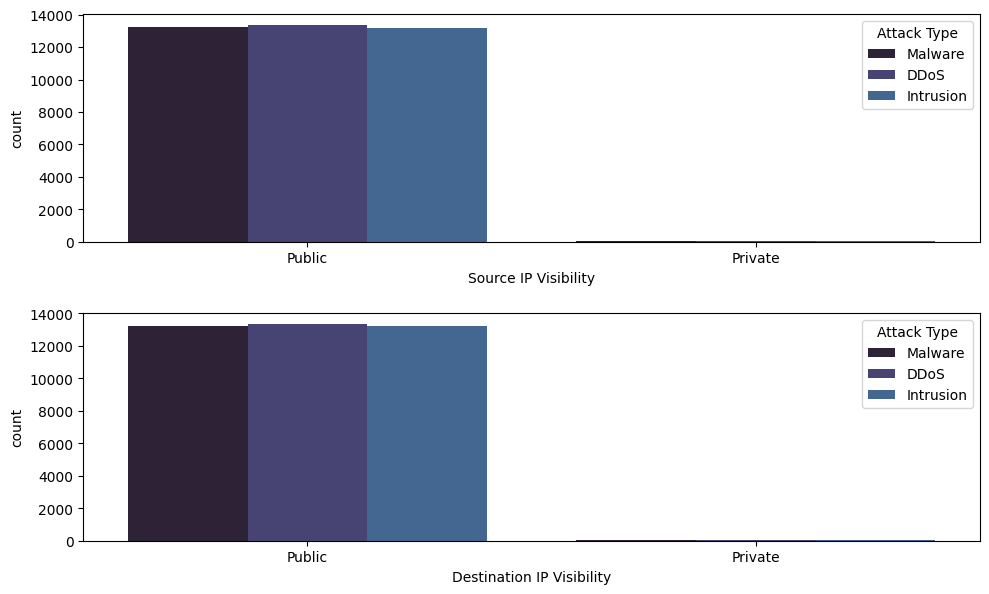

In [30]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Source IP Visibility', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='Destination IP Visibility', hue='Attack Type',ax=ax2)
plt.tight_layout(h_pad=2)

plt.show()

In [32]:
# Iterate over DataFrame rows
from uaparser import UAParser as parse_ua

for index, row in cyber_security_df.iterrows():
    parsed_ua = parsed_ua = parse_ua(row['Device Information']) 

    os_name = parsed_ua.os.get('name') or 'Unknown'# Major version

    browser_name = parsed_ua.browser.get('name') or 'Unknown'

    device_type = parsed_ua.device.get('type') or  'PC'

    # Assign extracted values to new columns
    cyber_security_df.at[index, 'OS'] = os_name
    cyber_security_df.at[index, 'Browser'] = browser_name
    cyber_security_df.at[index, 'Device'] = device_type

In [33]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Timestamp                    0
Source IP Address            0
Destination IP Address       0
Source Port                  0
Destination Port             0
Protocol                     0
Packet Length                0
Packet Type                  0
Traffic Type                 0
Payload Data                 0
Malware Indicators           0
Anomaly Scores               0
Alerts/Warnings              0
Attack Type                  0
Attack Signature             0
Action Taken                 0
Severity Level               0
User Information             0
Device Information           0
Network Segment              0
Geo-location Data            0
Proxy Information            0
Firewall Logs                0
IDS/IPS Alerts               0
Log Source                   0
Source IP Class              0
Destination IP Class         0
Source IP Visibility         0
Destination IP Visibility    0
OS                           0
Browser                      0
Device                       0
dtype: i

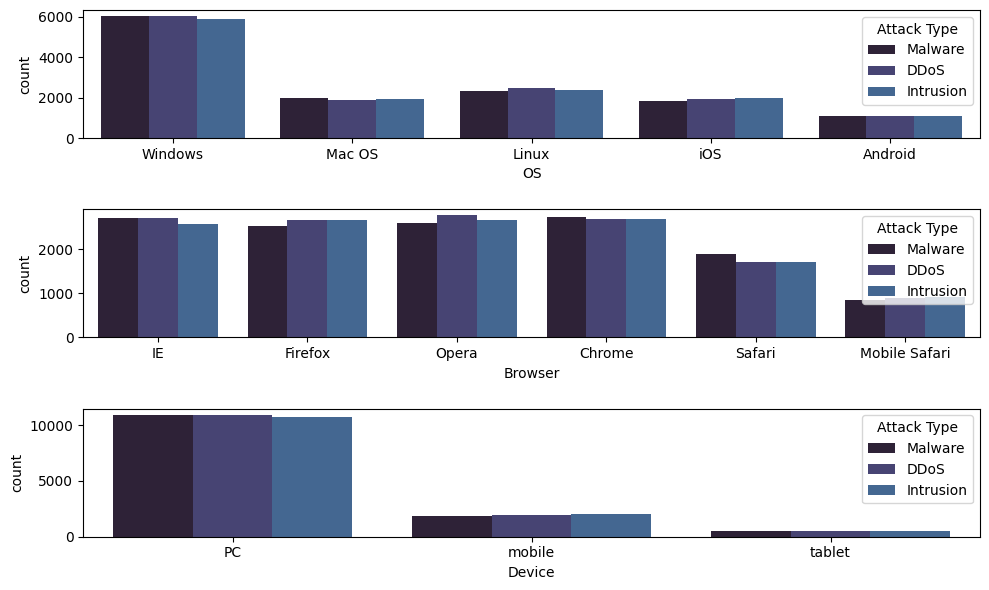

Malware Indicators
IoC Detected    20000
No Detection    20000
Name: count, dtype: int64

In [34]:
sns.set_palette("mako")

fig,(ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='OS', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='Browser', hue='Attack Type',ax=ax2)

# Firewall Logs
sns.countplot(data=cyber_security_df, x='Device', hue='Attack Type',ax=ax3)


plt.tight_layout(h_pad=2)
plt.show()
cyber_security_df['Malware Indicators'].value_counts()

In [35]:
def categorize_port(port: int):
    if 0 <= port <= 1023:
        return 'SystemPorts'
    elif 1024 <= port <= 49151:
        return 'UserPorts'
    elif 49152 <= port <= 65535:
        return 'Dynamic'
    else:
        return 'Unknow'

In [38]:
cyber_security_df['Source Port Category'] = cyber_security_df['Source Port'].apply(categorize_port)
cyber_security_df['Destination Port Category'] = cyber_security_df['Destination Port'].apply(categorize_port)

In [39]:
cyber_security_df.isnull().sum().sort_values(ascending=False)

Timestamp                    0
Source IP Address            0
Destination IP Address       0
Source Port                  0
Destination Port             0
Protocol                     0
Packet Length                0
Packet Type                  0
Traffic Type                 0
Payload Data                 0
Malware Indicators           0
Anomaly Scores               0
Alerts/Warnings              0
Attack Type                  0
Attack Signature             0
Action Taken                 0
Severity Level               0
User Information             0
Device Information           0
Network Segment              0
Geo-location Data            0
Proxy Information            0
Firewall Logs                0
IDS/IPS Alerts               0
Log Source                   0
Source IP Class              0
Destination IP Class         0
Source IP Visibility         0
Destination IP Visibility    0
OS                           0
Browser                      0
Device                       0
Source P

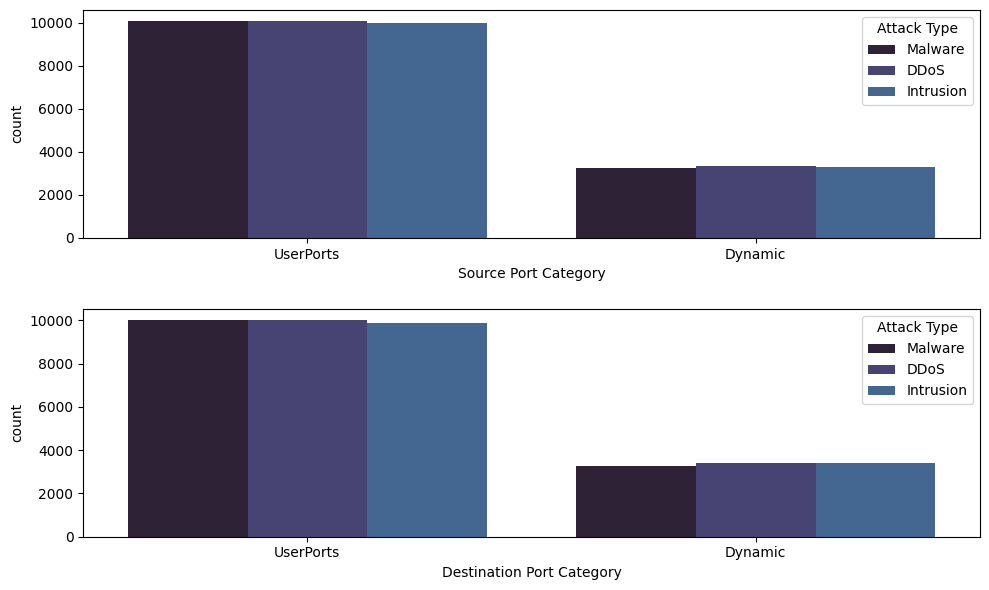

In [279]:
sns.set_palette("mako")

fig,(ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=False)

# Malware Indicators
sns.countplot(data=cyber_security_df, x='Source Port Category', hue='Attack Type',ax=ax1)

# IDS/IPS Alerts
sns.countplot(data=cyber_security_df, x='Destination Port Category', hue='Attack Type',ax=ax2)
plt.tight_layout(h_pad=2)

plt.show()

In [40]:
cyber_security_df['Timestamp'] = pd.to_datetime(cyber_security_df['Timestamp'])
    
cyber_security_df['Year'] = cyber_security_df['Timestamp'].dt.year
cyber_security_df['Month'] = cyber_security_df['Timestamp'].dt.month
cyber_security_df['Hour'] = cyber_security_df['Timestamp'].dt.hour
cyber_security_df['DayOfWeek'] = cyber_security_df['Timestamp'].dt.dayofweek

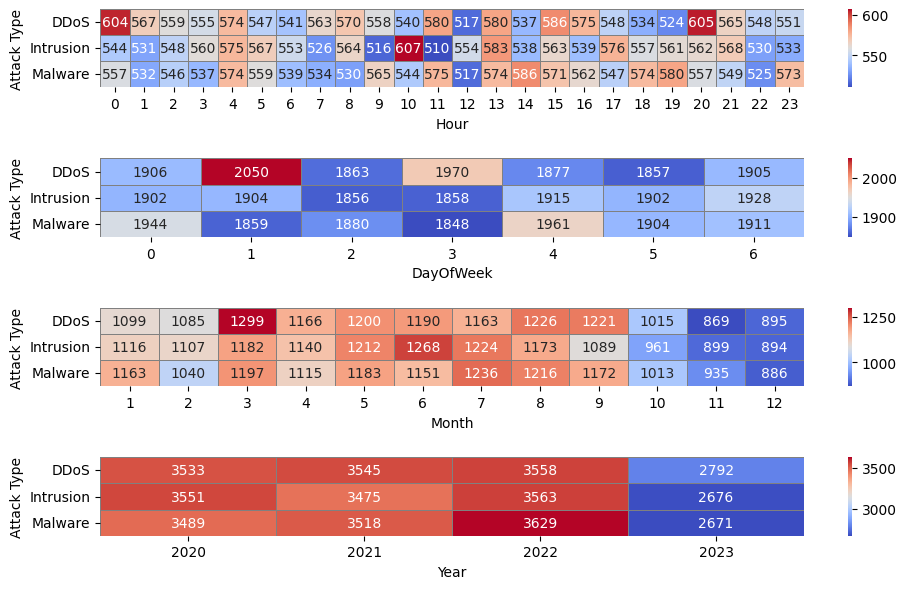

In [41]:
# Pivot the data to get a heatmap-friendly format
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("mako")

fig,(ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 6), sharex=False)

time_axes_pairs = [('Hour', ax1), ('DayOfWeek', ax2), ('Month', ax3), ('Year', ax4)]

for t, ax in time_axes_pairs:
    groupby = cyber_security_df.groupby([t, 'Attack Type']).size().reset_index(name='Count')
    pivot_table = groupby.pivot(index='Attack Type', columns=t, values='Count').fillna(0)
    sns.heatmap(pivot_table, cmap="coolwarm", linewidths=0.5, linecolor="gray", annot=True, fmt=".0f", ax=ax)


plt.tight_layout(h_pad=2)

plt.show()




C:\Users\SachiththaKonaraMudi\AppData\Local\Temp\ipykernel_24108\556717634.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Attack Type")


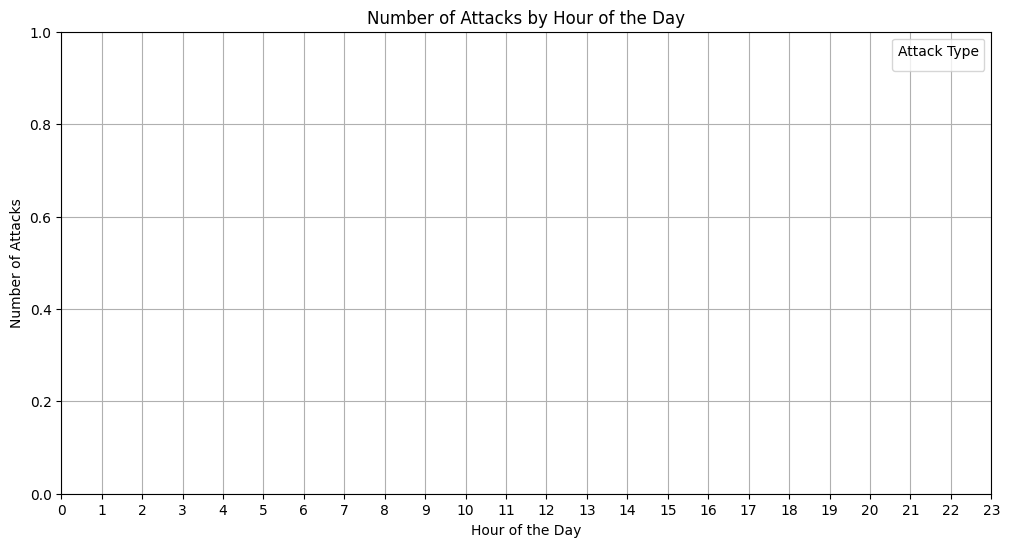

C:\Users\SachiththaKonaraMudi\AppData\Local\Temp\ipykernel_24108\556717634.py:32: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(h_pad=2)


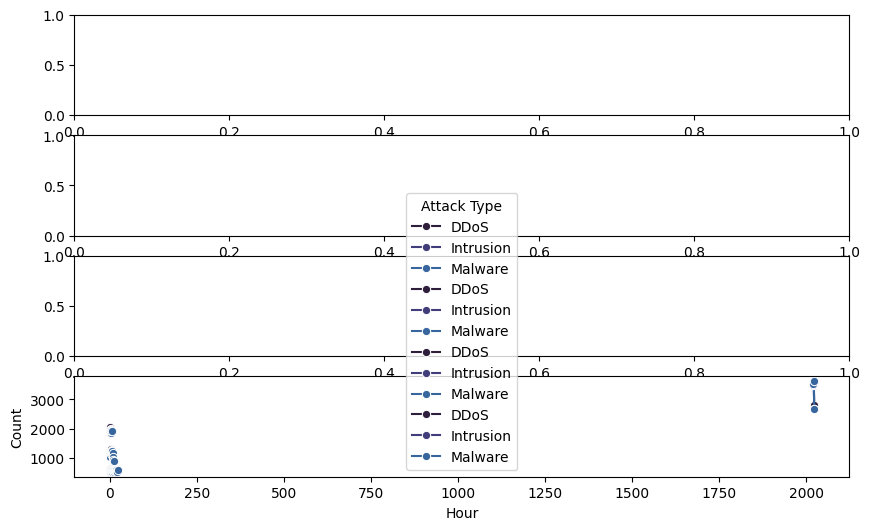

In [282]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group and reshape data for line/bar plot
attack_counts_by_hour = cyber_security_df.groupby(['Hour', 'Attack Type']).size().reset_index(name='Count')

# Line Plot
plt.figure(figsize=(12, 6))


# Formatting
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Attacks")
plt.title("Number of Attacks by Hour of the Day")
plt.xticks(range(0, 24))  # Ensuring all hours are visible
plt.grid(True)
plt.legend(title="Attack Type")

plt.show()

sns.set_palette("mako")

fig,(ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 6), sharex=False)

time_axes_pairs = [('Hour', ax1), ('DayOfWeek', ax2), ('Month', ax3), ('Year', ax4)]

for t, ax in time_axes_pairs:
    groupby = cyber_security_df.groupby([t, 'Attack Type']).size().reset_index(name='Count')
    sns.lineplot(data=groupby, x=t, y='Count', hue='Attack Type', marker='o')


plt.tight_layout(h_pad=2)

plt.show()

In [42]:
cyber_security_df["State"] = cyber_security_df['Geo-location Data'].apply(lambda x: x.split(",")[-1])

In [43]:
cyber_security_df["Packet Length Category"] = pd.cut(cyber_security_df['Packet Length'], bins = [0, 64, 512, 1023, 1499, float('inf')], labels = ['Small', 'Medium', 'Large', 'Very Large', 'Huge'])

In [44]:
cyber_security_df['Location Attack Frequency'] = cyber_security_df.groupby('State').cumcount()

In [45]:
cyber_security_df['User Attack Frequency'] = cyber_security_df.groupby('User Information').cumcount()

In [46]:
cyber_security_df = cyber_security_df.sort_values(by='Timestamp')
cyber_security_df['Attack Type'].value_counts()
cyber_security_df.isnull().sum().sort_values(ascending=False)

Timestamp                    0
Source IP Address            0
Destination IP Address       0
Source Port                  0
Destination Port             0
Protocol                     0
Packet Length                0
Packet Type                  0
Traffic Type                 0
Payload Data                 0
Malware Indicators           0
Anomaly Scores               0
Alerts/Warnings              0
Attack Type                  0
Attack Signature             0
Action Taken                 0
Severity Level               0
User Information             0
Device Information           0
Network Segment              0
Geo-location Data            0
Proxy Information            0
Firewall Logs                0
IDS/IPS Alerts               0
Log Source                   0
Source IP Class              0
Destination IP Class         0
Source IP Visibility         0
Destination IP Visibility    0
OS                           0
Browser                      0
Device                       0
Source P

In [65]:
df = cyber_security_df.copy()

In [66]:
df["Is Proxy Used"] = df['Proxy Information'].apply(lambda x: "No" if pd.isna(x) else "Yes")

In [67]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Source IP Class', 'Destination IP Class', 'Source IP Visibility',
       'Destination IP Visibility', 'OS', 'Browser', 'Device',
       'Source Port Category', 'Destination Port Category', 'Year', 'Month',
       'Hour', 'DayOfWeek', 'State', 'Packet Length Category',
       'Location Attack Frequency', 'User Attack Frequency', 'Is Proxy Used'],
      dtype='object')

In [68]:
cols_to_drop = ['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Device Information', 'Proxy Information', "User Information", "Geo-location Data", "Payload Data", "State"]

df = df.drop(columns=cols_to_drop, axis=1)


In [52]:
df['Severity Level'].value_counts()

Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

# 1. Exploration of raw data

In [69]:
attack_type_dict = {
    "DDoS": 0,      
    "Malware": 1,  
    "Intrusion": 2    
    
}

df['Attack Type'] = df['Attack Type'].apply(lambda x: attack_type_dict.get(x))

In [71]:
severity_level_dict = {
    "Low": 0,      
    "Medium": 1,  
    "High": 2    
}

df['Severity Level'] = df['Severity Level'].apply(lambda x: severity_level_dict.get(x))
df.columns

Index(['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'Source IP Class', 'Destination IP Class', 'Source IP Visibility',
       'Destination IP Visibility', 'OS', 'Browser', 'Device',
       'Source Port Category', 'Destination Port Category', 'Year', 'Month',
       'Hour', 'DayOfWeek', 'Packet Length Category',
       'Location Attack Frequency', 'User Attack Frequency', 'Is Proxy Used'],
      dtype='object')

In [75]:
categorical_columns = ['Protocol', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Alerts/Warnings', 'Attack Signature', 'Action Taken',
       'Network Segment', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source',
       'OS', 'Browser', 'Device', 'Source IP Class', 'Destination IP Class',
       'Source IP Visibility', 'Destination IP Visibility',
       'Source Port Category', 'Destination Port Category', 'Packet Length Category',
       'Is Proxy Used']

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)

In [76]:
df.columns

Index(['Packet Length', 'Anomaly Scores', 'Attack Type', 'Severity Level',
       'Year', 'Month', 'Hour', 'DayOfWeek', 'Location Attack Frequency',
       'User Attack Frequency', 'Protocol_TCP', 'Protocol_UDP',
       'Packet Type_Data', 'Traffic Type_FTP', 'Traffic Type_HTTP',
       'Malware Indicators_No Detection', 'Alerts/Warnings_Yes',
       'Attack Signature_Known Pattern B', 'Action Taken_Ignored',
       'Action Taken_Logged', 'Network Segment_Segment B',
       'Network Segment_Segment C', 'Firewall Logs_No Log Data',
       'IDS/IPS Alerts_No Alerts', 'Log Source_Server', 'OS_Linux',
       'OS_Mac OS', 'OS_Windows', 'OS_iOS', 'Browser_Firefox', 'Browser_IE',
       'Browser_Mobile Safari', 'Browser_Opera', 'Browser_Safari',
       'Device_mobile', 'Device_tablet', 'Source IP Class_Class B',
       'Source IP Class_Class C', 'Destination IP Class_Class B',
       'Destination IP Class_Class C', 'Source IP Visibility_Public',
       'Destination IP Visibility_Public', 'Sou

In [77]:
target = 'Attack Type'
y = df[target]
x = df.drop(columns=[target], axis=1)

In [78]:
from sklearn.model_selection import train_test_split, KFold
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

len(x_train.columns)


47

In [ ]:
from sklearn.feature_selection import RFECV

def list_important_features(model, x_train, y_train):
    selector =  RFECV(
        estimator=model,
        step=1,  # Remove 5 features at a time
        cv=5,
        scoring="accuracy",
        verbose=True
    )

    selector.fit(x_train, y_train)
    for i, col in zip(range(x_train.shape[1]), x_train.columns):
        print(f"{col} selected={selector.support_[i]} rank={selector.ranking_[i]}")


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import classification_report

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.36      0.34      2697
           1       0.34      0.31      0.32      2726
           2       0.31      0.32      0.32      2577

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



In [ ]:
list_important_features(rf_clf, x_train, y_train)


# Logistic Regression

In [331]:
x_train[x_train.columns[selected_features]]

,Anomaly Scores
26053,96.41
9206,45.12
20872,50.81
4804,54.91
18311,23.79
...,...
23872,67.47
17005,49.68
15653,11.35
5195,19.87


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics  import classification_report

lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
print(classification_report(y_test, y_pred))

c:\Users\SachiththaKonaraMudi\anaconda3\envs\cyber-attack-predictor\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.34      0.37      0.36      2697
           1       0.34      0.31      0.32      2726
           2       0.32      0.31      0.32      2577

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



In [ ]:
from xgboost import XGBRFClassifier
from sklearn.metrics  import classification_report

xg_clf = XGBRFClassifier(random_state=42)
xg_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.34      0.37      0.36      2697
           1       0.34      0.31      0.32      2726
           2       0.32      0.31      0.32      2577

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



In [322]:
from imblearn.over_sampling import SMOTE
sampling_strategy = {0: 50000, 1: 50000, 2: 50000}
smote = SMOTE(sampling_strategy = sampling_strategy, random_state = 42)
x_smote, y_smote = smote.fit_resample(x_train, y_train)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_smote, y_smote)
y_pred = rf_clf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.36      0.35      2697
           1       0.34      0.32      0.33      2726
           2       0.32      0.30      0.31      2577

    accuracy                           0.33      8000
   macro avg       0.33      0.33      0.33      8000
weighted avg       0.33      0.33      0.33      8000



In [296]:
#Importing  libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = '../../Data/raw/cybersecurity_attacks.csv'
df = pd.read_csv(dataset_path)

FileNotFoundError: [Errno 2] No such file or directory: '../../Data/raw/cybersecurity_attacks.csv'

## 1.1   Evaluating the answer from the three different attack types

In first part, we decided to focus on device reactions (defense) induced by the three attack types.
To do this, we focused on **actions taken** in function of **attack types**.


### Action Taken

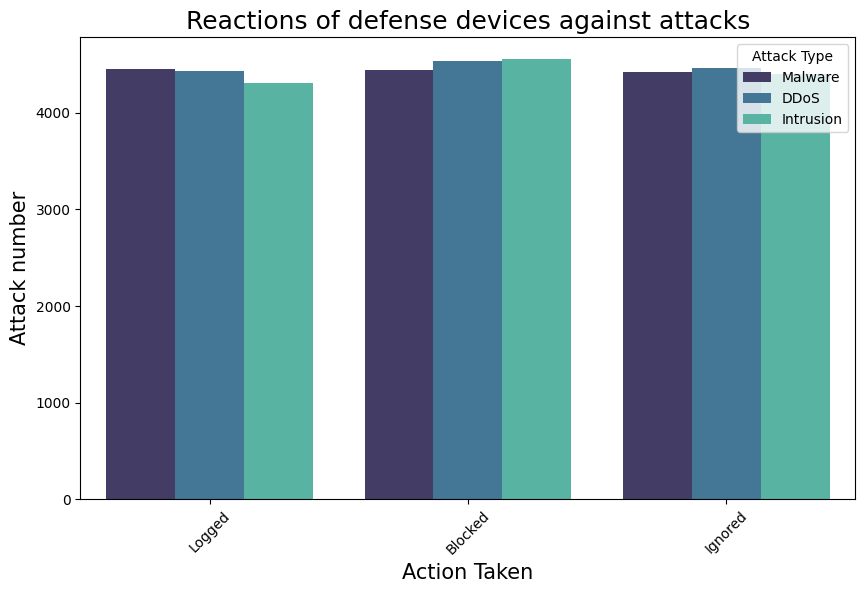

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Action Taken", hue="Attack Type", data=df, palette = "mako")
plt.title("Reactions of defense devices against attacks", fontsize=18)
plt.ylabel('Attack number', fontsize=15)
plt.xlabel("Action Taken", fontsize=15)
plt.xticks(rotation=45)
plt.show()



Among all modalities, we remarked the same defense responses, suggesting in our conditions that the three attacks types could activate the same device reactions. This result is not surprising according to previous definitions (nature type of attacks) because we supposed that attacks could induce different defense responses as  Malware by antivirus and DDoS or Intrusions by Firewalls  [1]).
In our case, there is no relationship between attack and the action taken by the devices.

### Severity level
To compare with the previous countplot, we tryed to determine the impact of each event using the severity level.

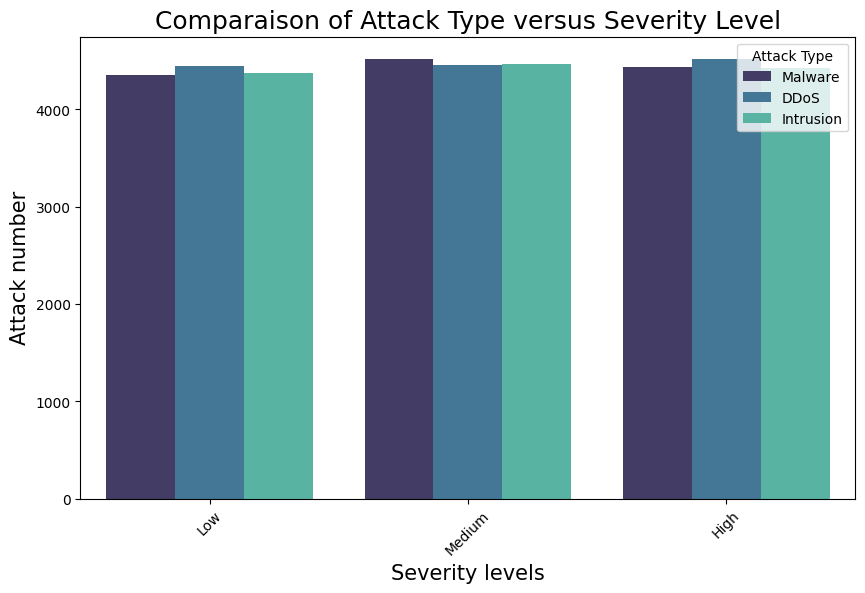

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Severity Level', hue='Attack Type', data=df, palette = "mako")
plt.title('Comparaison of Attack Type versus Severity Level', fontsize=18)
plt.ylabel('Attack number', fontsize=15)
plt.xlabel("Severity levels", fontsize=15)
plt.xticks(rotation=45)
plt.show()




As before, we detect the same signal between the modalities, suggesting an equivalent severity level induced by the three attack types on devices. This feature didn't provide enough details on the defense origin activated by the attack ( for instance : malware/antivirus, DDos/firewall, Intrusion/firewall-IDS/IPS).\
 To go further into this hypothesis we tried to visualize the relationship betwenn severity levels with the following values :  Firewall Logs, IDS/IPS Alerts, Malware Indicators

### Firewall Logs, IDS/IPS Alerts, Malware Indicators

Code is inspired from [seaborn barplots](https://seaborn.pydata.org/examples/palette_choices.html) :

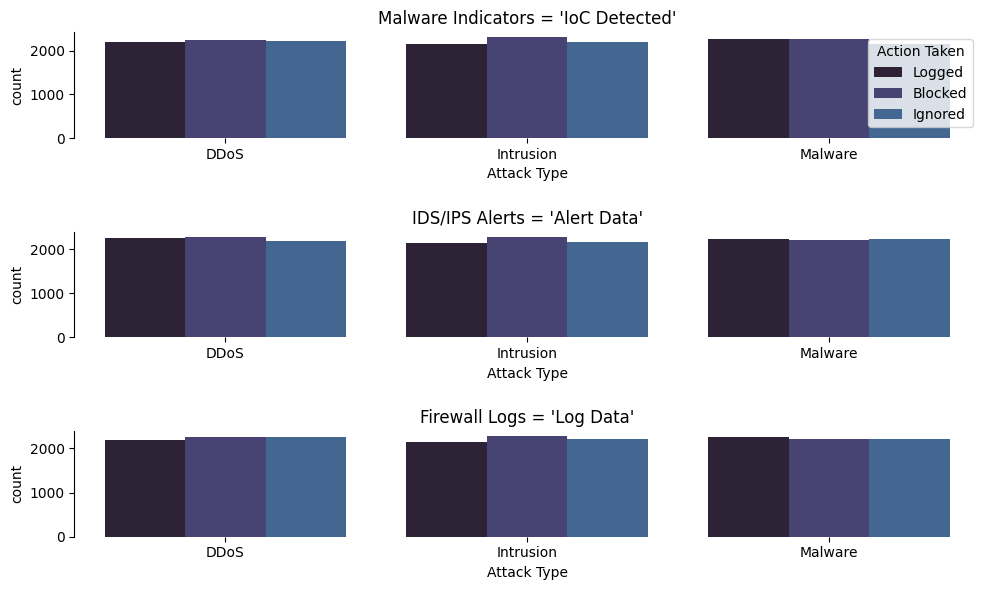

In [ ]:
sns.set_palette("mako")

f,(ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), sharex=False)

sns.countplot(x='Attack Type', hue='Action Taken', data=df[df['Malware Indicators'] == 'IoC Detected'], ax=ax1, order=['DDoS', 'Intrusion', 'Malware'])
ax1.set_title("Malware Indicators = 'IoC Detected'")

sns.countplot(x='Attack Type', hue='Action Taken', data=df[df['IDS/IPS Alerts'] == 'Alert Data'], ax=ax2, order=['DDoS', 'Intrusion', 'Malware'])
ax2.set_title("IDS/IPS Alerts = 'Alert Data'")

sns.countplot(x='Attack Type', hue='Action Taken', data=df[df['Firewall Logs'] == 'Log Data'], ax=ax3,order=['DDoS', 'Intrusion', 'Malware'])
ax3.set_title("Firewall Logs = 'Log Data'")
ax2.get_legend().remove()
ax3.get_legend().remove()
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.show()


### Anomaly score and destination ports

For Malware indicator: IoC Detected is an alert to identify a malware or a malicious activity by a device, suggesting it is not a specific malware indicator. We cannot exclude the combination between several attack types during one event (ex: botnet) as well as the false detections. \
For the two other parameters: \
Intrusion or Firewall could both be activated by all the three attack types [1].
Thus, our result suggests that the device parameters cannot be used separately to characterize the attack type, however, a combination of different features could help us to have more precise information about this malicious event.

Every digital device uses ports to receive and send data via the internet or a network.
The destination ports are, in our context, the ports in which packets containing malicious data are sent from the hacker to the target to exploit a host service or vulnerability.
For example, ports 80, 443, 8080 and 8443 are commonly used for DDoS attacks [3].
Malware is a computer program recognized mainly by antivirus and in few cases firewalls. It is correlated by high abnormal scores
compared to DDoS and intrusions, which are more challenging to detect because antivirus (designed for malware) are not able to accurately identify them. [1].
Given this information, we set out to determine in our data set whether there was a relationship between the
destination ports and the abnormal scores for suspicious events, depending on the attack types.


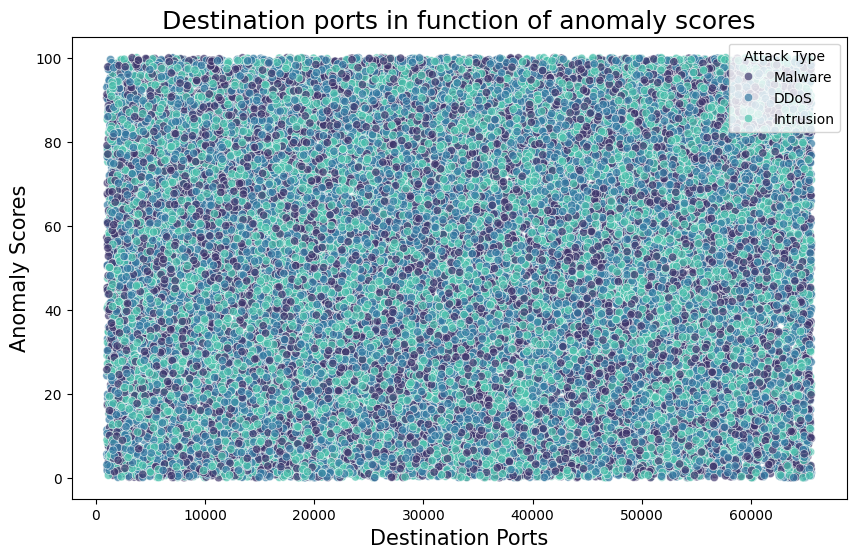

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Destination Port", y="Anomaly Scores", hue="Attack Type", data=df, palette="mako", alpha=0.7)
plt.title("Destination ports in function of anomaly scores", fontsize=18)
plt.xlabel("Destination Ports", fontsize=15)
plt.ylabel("Anomaly Scores", fontsize=15)
plt.legend(title="Attack Type", bbox_to_anchor=(1,1), loc="upper right")
plt.show()



The data presented in this scatterplot show a great diversity of values, which do not allow us to get clusters clearly defined by precise parameters. All the points are arranged heterogeneously across the whole figure, without showing any dependency between destination ports, abnormal scores and the type of attack.\
Thus, these results suggest the absence of relationships between these parameters in our data set.

## 1.2 Sensibility evaluation of attack type on the network traffic category

### Network segmentation

Network segmentation is an IT safeguard to prevent cyberattacks. It divides a computer park into subnetworks by assigning different access rights according to status to limit the exposure of sensitive data to personal who do not need to use this information (administrators versus Research unit for instance) [1].

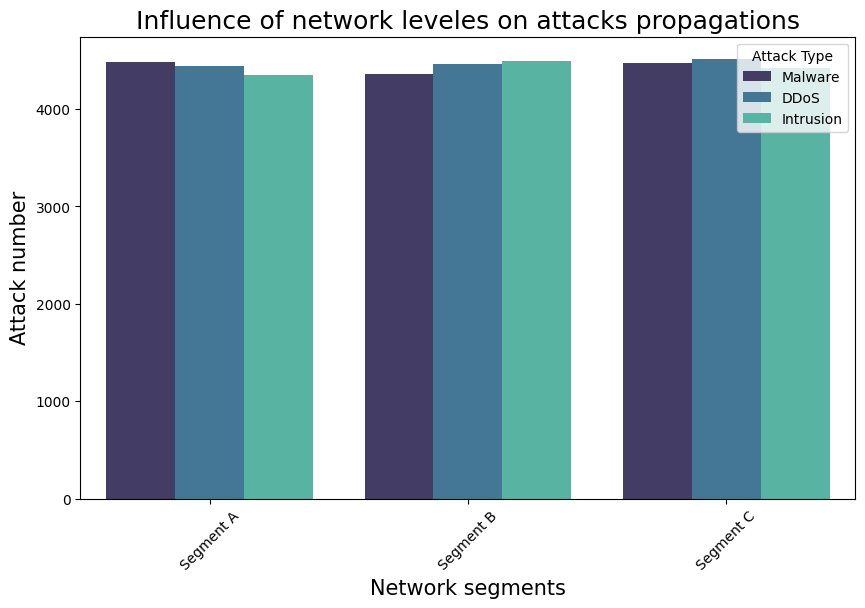

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Network Segment", hue="Attack Type", data=df, palette = "mako")
plt.title("Influence of network leveles on attacks propagations", fontsize=18)
plt.ylabel('Attack number', fontsize=15)
plt.xlabel("Network segments", fontsize=15)
plt.xticks(rotation=45)
plt.show()


In our context, we observed no influence of network segmentation on the type of attack.

### Protocols

The protocols define the different digital payload transfer methods between devices.
Under specific conditions, the pirates can hide their attacks by using some of them to hijack firewalls or other defense related responses.\
For example, ICMP is often used in intrusion contexts because they allow to scann all destinations port to find one of them which be open.\
The UDP and TCP protocols are also used for malware and DDos attacks [4 - 7].


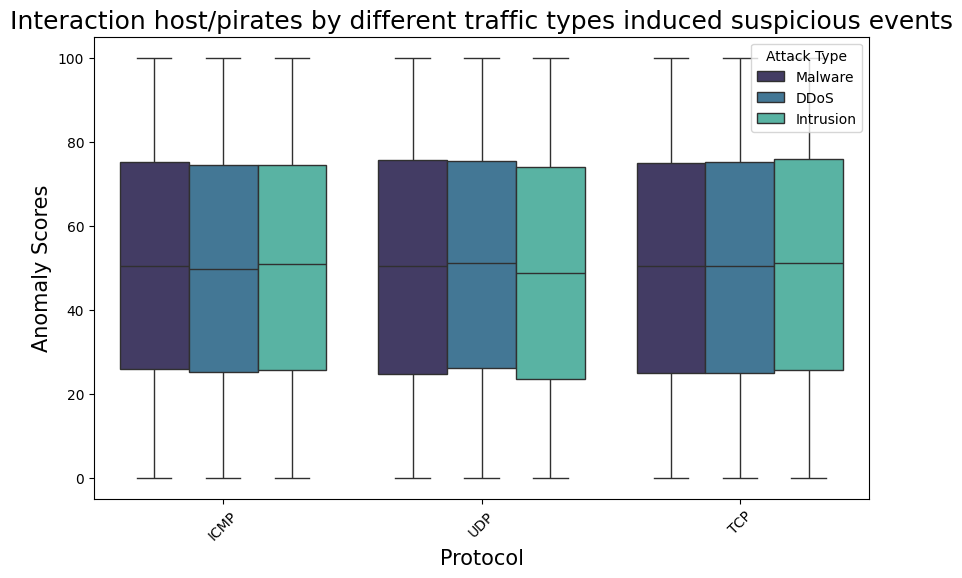

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Protocol", y="Anomaly Scores", hue="Attack Type", data=df , palette="mako")
plt.title("Interaction host/pirates by different traffic types induced suspicious events", fontsize=18)
plt.xlabel("Protocol", fontsize=15)
plt.ylabel("Anomaly Scores", fontsize=15)
plt.xticks(rotation=45)
plt.legend(title="Attack Type")
plt.show()



All types of attack use the same type of traffic and induce the same quality of anomalous event detection, suggesting absence of interaction between the features.

### Traffic Type and packet length
The nature of the traffic is also another network parameter involved in data exchange. They describe the type of information which is transmitted between devices thanks to protocols.\
They can be safe (web browsing, e-mail) or dangerous (DDoS, data ex-filtration) depending on their behaviors or sources.\
Traffic type defines the priority and management of packets, data transmission units belonging to a communication flow, with the structure of an header (information needed to ensure proper routing, such as IP address, port, protocol, etc.), a payload (nature of the content) and a tail (error detection) [8].\
Packets can be vectors carrying malicious content capable of infecting devices via various types of traffic, some of which may be legitimate (i.e covert channels [9]).\
Depending on the type of attack, packets have different sizes, i.e. larger for DDoS than for malware. Generally, intrusions use smaller volumes of packets than the other two types of attack [1]. Thus the combination of packet and traffic type may indicate an attack or suspicious activity.

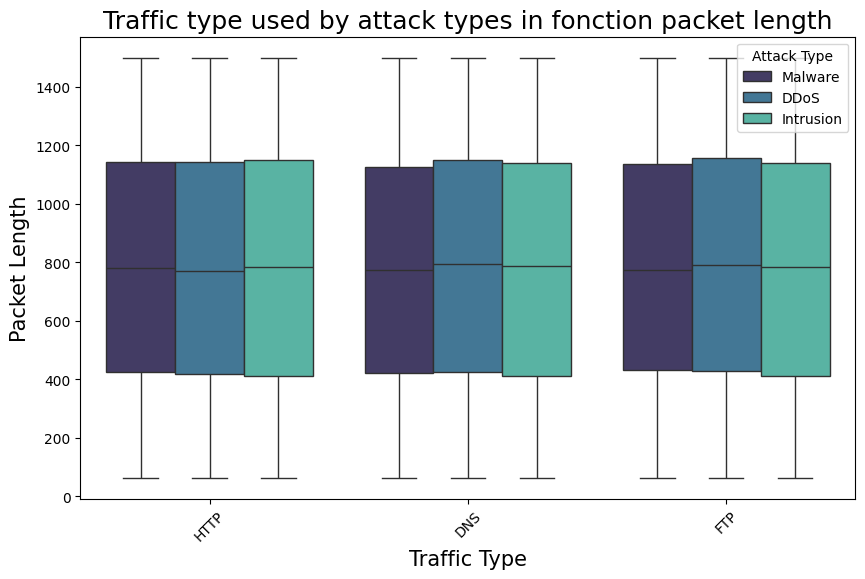

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Traffic Type", y="Packet Length", hue="Attack Type", data=df , palette="mako")
plt.title("Traffic type used by attack types in fonction packet length", fontsize=18)
plt.xlabel("Traffic Type", fontsize=15)
plt.ylabel("Packet Length", fontsize=15)
plt.xticks(rotation=45)
plt.legend(title="Attack Type")
plt.show()

In our conditions, all type attacks used the same kind of traffic type with comparable packet length, suggesting no link between these parameters.

## 1.3 Temporal overview

To finish our data exploration, we focused on the timestamp to have a temporal macro vision of our study and try to see if some attack types have typical dates to isolate them. We made this figure to plot the trend of malware, DDoS and intuitions events during all the timestamp described by our data set.

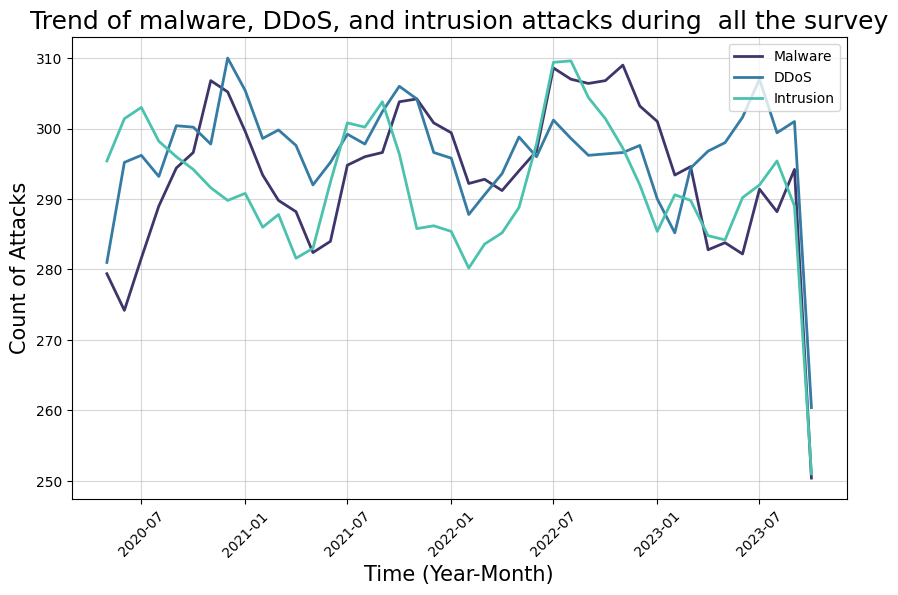

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['YearMonth'] = df['Timestamp'].dt.to_period('M')
attack_types = ['Malware', 'DDoS', 'Intrusion']
colors = sns.color_palette("mako", n_colors=len(attack_types))
plt.figure(figsize=(10, 6))

for i, attack in enumerate(attack_types):
    attack_data = df[df['Attack Type'] == attack].groupby('YearMonth').size().reset_index(name='AttackCount')
    attack_data['Mean'] = attack_data['AttackCount'].rolling(window=5).mean()
    attack_data['YearMonth'] = attack_data['YearMonth'].dt.to_timestamp()
    plt.plot(attack_data['YearMonth'], attack_data['Mean'], label=attack, linewidth=2, color=colors[i])


plt.title('Trend of malware, DDoS, and intrusion attacks during  all the survey', fontsize=18)
plt.xlabel('Time (Year-Month)', fontsize=15)
plt.ylabel('Count of Attacks', fontsize=15)
plt.xticks(rotation=45)
plt.legend(fontsize=10, loc='upper right')
plt.grid(alpha=0.5)
plt.show()


Unfortunately, the curves have the same pattern during all the study. This result showed the time scale of our data set cannot be used to extract specific information on attack types.

## 1.4 Conclusions:
Our raw data exploration gives no obvious relations between the different attributes available due to the high variability levels of intra and inter features.
Therefore, we need to go further to understand our database. For example, we can transform and create new variables from the raw data or find new ones. These feature engineering steps could improve our analysis and maximize the chance to predict the attack types thanks to machine learning approach.
 Thus, the next part of this notebook describes in detail our feature enhancement before to start machine learning.

Bibliographical references:\
[1]: *"Il était une faille: Histoires marquantes de cybersécurité pour frissonner et s’en protéger"* by Marine Du Mesnil and Paul Molin, Ed. theodo\
[2]: https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/data  \
[3]: https://blog.netwrix.fr/2023/07/20/liste-des-vulnerabilites-liees-aux-ports-ouverts/  \
[4]: https://fr.radware.com/security/ddos-knowledge-center/ddospedia/udp-flood/   \
[5]: https://www.paloaltonetworks.com/blog/2014/06/udp-malware-hiding-place-of-choice/   \
[6]: https://www.malwarepatrol.net/the-evolution-of-c2-communication-channels/  \
[7]: https://hogonext.com/how-to-detect-and-mitigate-tcp-based-ddos-attacks/   \
[8]: https://www.techtarget.com/searchnetworking/definition/packet  \
[9]: https://www.dst.defence.gov.au/sites/default/files/publications/documents/DST-Group-TN-1695.pdf
